In [ ]:
import os
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50
import time
from torch.autograd import Variable
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from keras.preprocessing import image
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path='/content/drive/MyDrive/Colab Notebooks/CV1/project'

In [ ]:
os.listdir(data_path)

['test', 'train', 'Images', 'list_attribute.csv']

In [ ]:
images_list = os.listdir(data_path+'/Images')
#images_list

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV1/project/list_attribute.csv')
df.replace(to_replace = -1, value = 0,inplace = True )
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
new_df = df[df['image_id'].isin(images_list)]
new_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
50,000051.jpg,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51,000052.jpg,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
64,000065.jpg,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
165,000166.jpg,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
197,000198.jpg,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202319,202320.jpg,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
202339,202340.jpg,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,1
202346,202347.jpg,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
202356,202357.jpg,0,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,1,1,0,1


In [ ]:
data = new_df[['image_id','Male']]
#data.set_index('image_id', inplace = True)
data.head()

,image_id,Male
50,000051.jpg,1
51,000052.jpg,1
64,000065.jpg,1
165,000166.jpg,1
197,000198.jpg,0


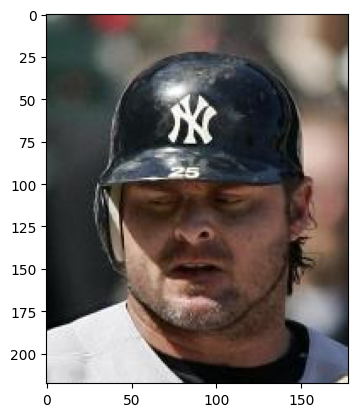

,image_id,Male
165,000166.jpg,1


In [ ]:
picture = '/content/drive/MyDrive/Colab Notebooks/CV1/project/Images/000166.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
filename = os.path.basename(picture)
data[data['image_id'] == filename][['image_id', 'Male']]
#data.loc[picture.split('/')[-1]].split('/')[-1]][['Male']]

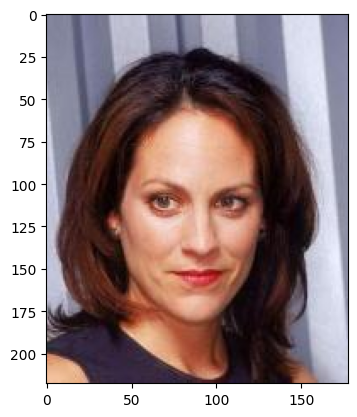

,image_id,Male
197,000198.jpg,0


In [ ]:
picture = '/content/drive/MyDrive/Colab Notebooks/CV1/project/Images/000198.jpg'
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/CV1/project/Images/000198.jpg')
imgplot = plt.imshow(img)
plt.show()
filename = os.path.basename(picture)
data[data['image_id'] == filename][['image_id', 'Male']]

In [ ]:
# Split the DataFrame
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Directory containing image files
image_directory = '/content/drive/MyDrive/Colab Notebooks/CV1/project/Images'

# Directories to store the train and test images
train_image_dir = '/content/drive/MyDrive/Colab Notebooks/CV1/project/train'
test_image_dir = '/content/drive/MyDrive/Colab Notebooks/CV1/project/test'



In [ ]:
# Iterate through the image files and move them to the appropriate subfolders
#for image_id, male in zip(train_data['image_id'], train_data['Male']):
#    source_path = os.path.join(image_directory, image_id)
#    target_dir = os.path.join(train_image_dir, str(male))
#    os.makedirs(target_dir, exist_ok=True)  # Create subfolder if it doesn't exist
#    target_path = os.path.join(target_dir, image_id)
#    shutil.copy(source_path, target_path)

#for image_id, male in zip(test_data['image_id'], test_data['Male']):
#    source_path = os.path.join(image_directory, image_id)
#    target_dir = os.path.join(test_image_dir, str(male))
#    os.makedirs(target_dir, exist_ok=True)  # Create subfolder if it doesn't exist
#    target_path = os.path.join(target_dir, image_id)
#    shutil.copy(source_path, target_path)

In [ ]:
test_data.head()

,image_id,Male
60964,060965.jpg,1
103729,103730.jpg,1
107305,107306.jpg,1
42409,042410.jpg,1
28519,028520.jpg,1


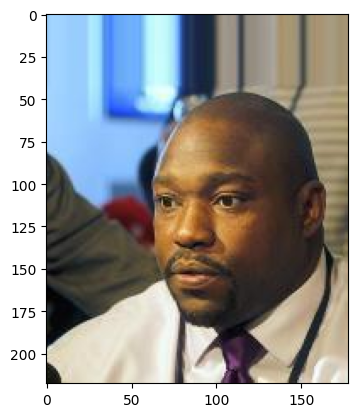

In [ ]:
picture2 = '/content/drive/MyDrive/Colab Notebooks/CV1/project/test/1/028520.jpg'
img2 = mpimg.imread(picture2)
imgplot2 = plt.imshow(img2)
plt.show()

In [ ]:
train_data.head()

,image_id,Male
171264,171265.jpg,1
189512,189513.jpg,1
32355,032356.jpg,0
148049,148050.jpg,0
170129,170130.jpg,0


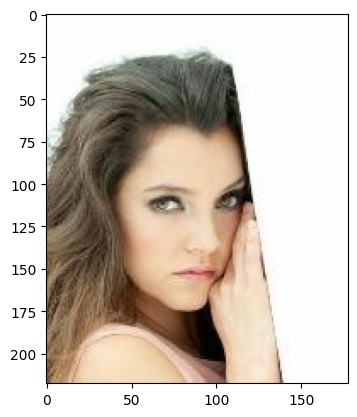

In [ ]:
picture2 = '/content/drive/MyDrive/Colab Notebooks/CV1/project/train/0/148050.jpg'
img2 = mpimg.imread(picture2)
imgplot2 = plt.imshow(img2)
plt.show()

In [ ]:
#create trainining generator
train_generator = ImageDataGenerator(rescale=1./255,
                                     #horizontal_flip=True,
                                     #vertical_flip=True,
                                     #width_shift_range = 0.3,
                                     #height_shift_range = 0.3,
                                     #fill_mode='nearest'
                                     #preprocessing_function=add_noise,
                                     brightness_range=[0.5, 1.5],
                                     rotation_range=25,
                                     zoom_range=0.3,
                                     shear_range=0.3
                                     )

In [ ]:
#create training data generator
train_data = train_generator.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CV1/project/train',
                                                 target_size=(250, 250),
                                                 batch_size=48,
                                                 class_mode='binary')

Found 4000 images belonging to 2 classes.


In [ ]:
#create data validation
val_generator = ImageDataGenerator(rescale=1./255)

val_data = val_generator.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CV1/project/test',
                                             target_size=(250, 250),
                                             class_mode='binary',
                                             batch_size=128)

Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

pre_trained_model = VGG19(input_shape = (250, 250, 3),
                          include_top = False,
                          weights = 'imagenet')

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
    ]
)

In [ ]:
pre_trained_model.trainable = False

inputs = keras.Input(shape=(250, 250, 3))
x = data_augmentation(inputs)

#scale_layer = keras.layers.Rescaling(scale=1/127.5, offset=-1)
#x = scale_layer(x)

x = pre_trained_model(x, training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1)(x)
#x = tf.keras.layers.Dense  (1, activation='softmax')(x)

model_vgg19 = tf.keras.Model(inputs, outputs)


In [ ]:
model_vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 250, 250, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                             

In [ ]:
#reduce learning rate
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='acc',
    factor=0.2,
    patience=2,
    mode='auto',
    min_lr=2e-7)

In [ ]:
#early stop
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="acc",
    patience=5,
    min_delta=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

In [ ]:
model_vgg19.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['acc'])

In [ ]:
history_vgg19 = model_vgg19.fit(train_data,
                                #steps_per_epoch=len(train_data),
                                epochs=20,
                                #callbacks = [reduce_lr,early_stop],
                                #verbose=1,
                                validation_data=val_data)
                                #validation_steps=len(val_data))

Epoch 1/20
84/84 [==============================] - 934s 11s/step - loss: 2.8277 - acc: 0.5008 - val_loss: 0.6781 - val_acc: 0.5680
Epoch 2/20
84/84 [==============================] - 102s 1s/step - loss: 1.6290 - acc: 0.5228 - val_loss: 0.6342 - val_acc: 0.6260
Epoch 3/20
84/84 [==============================] - 99s 1s/step - loss: 1.3400 - acc: 0.5365 - val_loss: 0.6182 - val_acc: 0.6670
Epoch 4/20
84/84 [==============================] - 104s 1s/step - loss: 0.9034 - acc: 0.5440 - val_loss: 0.5992 - val_acc: 0.6880
Epoch 5/20
84/84 [==============================] - 97s 1s/step - loss: 1.0905 - acc: 0.5705 - val_loss: 0.5862 - val_acc: 0.7020
Epoch 6/20
84/84 [==============================] - 98s 1s/step - loss: 0.7977 - acc: 0.5717 - val_loss: 0.5774 - val_acc: 0.7090
Epoch 7/20
84/84 [==============================] - 98s 1s/step - loss: 0.8164 - acc: 0.5750 - val_loss: 0.5660 - val_acc: 0.6810
Epoch 8/20
84/84 [==============================] - 96s 1s/step - loss: 0.7757 - acc: 

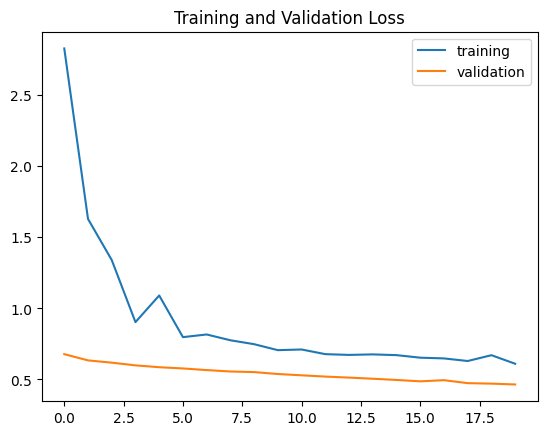

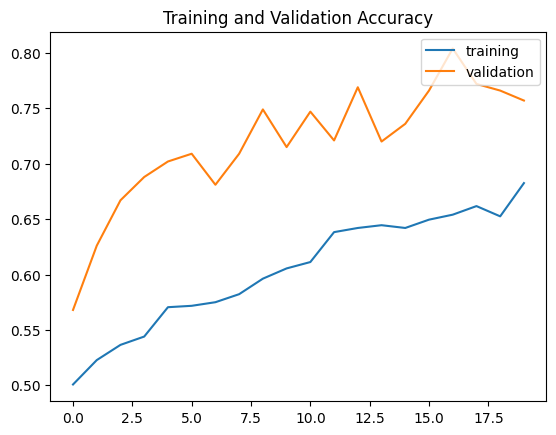

In [ ]:
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

plt.plot(history_vgg19.history['acc'])
plt.plot(history_vgg19.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.legend(['training','validation'], loc='upper right')
plt.show()


In [ ]:
#num_of_test_samples = 250
from sklearn.metrics import classification_report, confusion_matrix

model = model_vgg19
val_data = val_generator.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CV1/project/test',
                                                              batch_size=48,
                                                              class_mode='binary',
                                                              target_size=(250, 250),
                                                              shuffle = False)

#filenames = val_data.filenames
#nb_samples = len(filenames)
#check what happens

y_true = val_data.classes
Y_pred = model.predict(val_data)
y_pred = np.where(Y_pred>0.5, 1, 0)

print('Confusion Matrix')
print('Classification Report')
# target_names = ['0', '1']
print(classification_report(y_true, y_pred))#, target_names=target_names))


Found 1000 images belonging to 2 classes.
21/21 [==============================] - 14s 662ms/step
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.96      0.83       596
           1       0.90      0.45      0.60       404

    accuracy                           0.76      1000
   macro avg       0.81      0.71      0.71      1000
weighted avg       0.79      0.76      0.73      1000



In [ ]:
pre_trained_model.trainable = True
model_vgg19.summary()

model_vgg19.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics= ['acc']
)

history_vgg19_2=model_vgg19.fit(train_data,
                epochs=10,
                validation_data=val_data)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, None   0         
                             )                                   
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1)                 513   

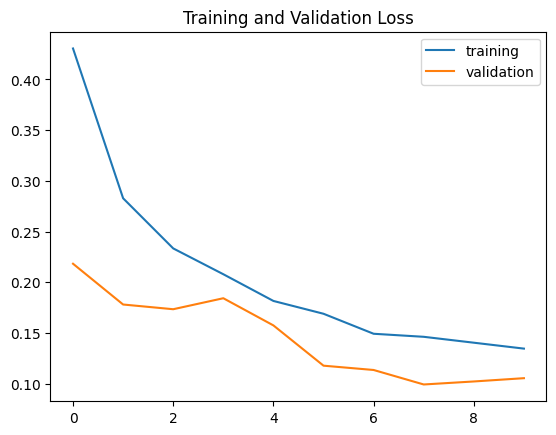

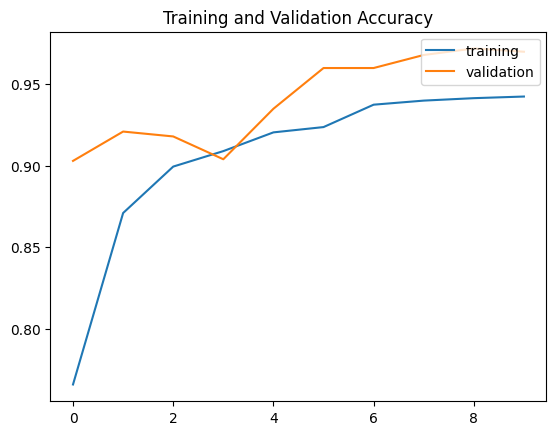

In [ ]:
plt.plot(history_vgg19_2.history['loss'])
plt.plot(history_vgg19_2.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

plt.plot(history_vgg19_2.history['acc'])
plt.plot(history_vgg19_2.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.legend(['training','validation'], loc='upper right')
plt.show()


In [ ]:
#num_of_test_samples = 250
from sklearn.metrics import classification_report, confusion_matrix

model = model_vgg19
val_data = val_generator.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CV1/project/test',
                                                              batch_size=48,
                                                              class_mode='binary',
                                                              target_size=(250, 250),
                                                              shuffle = False)

#filenames = val_data.filenames
#nb_samples = len(filenames)

y_true = val_data.classes
Y_pred = model.predict(val_data)
y_pred = np.where(Y_pred>0.5, 1, 0)

print('Confusion Matrix')
print('Classification Report')
# target_names = ['0', '1']
print(classification_report(y_true, y_pred))#, target_names=target_names))


Found 1000 images belonging to 2 classes.
21/21 [==============================] - 7s 323ms/step
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       596
           1       0.95      0.97      0.96       404

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

